In [5]:
# Reading data in Panda.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [7]:
import wordcloud

In [8]:
from wordcloud import WordCloud

In [9]:
from sklearn.metrics import mean_squared_error

In [12]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
df = pd.read_csv(r"E:\newGithubfile\Data-Science-Pojects\Netflix-Dataset-Analysis\netflix1.csv")
print(df)
type(df)

     show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   duration  \
0     United States 

pandas.core.frame.DataFrame

In [13]:
# Top 5 rows
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [14]:
# Number of rows and columns
df.shape

(8790, 10)

In [15]:
# Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [16]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [19]:
df.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,2021-05-01,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [20]:
print('shape before deleting duplicate values:', df.shape)

shape before deleting duplicate values: (8790, 10)


In [21]:
# Checking duplicates rows and Removing duplicate rows if any.
print(df.duplicated().value_counts())
df.drop_duplicates(inplace=True)
print('shape after deleting duplicate values:', df.shape)

False    8790
Name: count, dtype: int64
shape after deleting duplicate values: (8790, 10)


In [22]:
# Check for missing Values.
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [26]:
df.describe(include = 'all')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,NaN,NaN,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,NaN,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,NaN,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,2019-05-17 21:44:01.638225408,2014.183163,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2018-04-06 00:00:00,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2019-07-03 00:00:00,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2020-08-19 18:00:00,2019.000000,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,NaN,NaN


In [27]:
# Finding unique values for each column.
# To understand which column is categorical and which one is continuous.
df.nunique()

show_id         8790
type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
dtype: int64

In [28]:
categorical_columns = []
continuous_columns = []

for column in df.columns[:-1]:
    unique_values = df[column].nunique()
    dtype = df[column].dtype
    # Check conditions: data type is 'object' and unique values <= 10
    if dtype == 'object' or unique_values <= 10:
        categorical_columns.append(column)

    else:
        continuous_columns.append(column)    

In [29]:
categorical_columns

['show_id', 'type', 'title', 'director', 'country', 'rating', 'duration']

In [30]:
continuous_columns

['date_added', 'release_year']

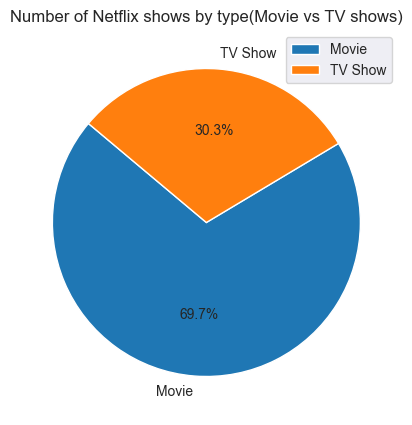

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


In [31]:
# What is the Count of Movies Vs TV Shows?
# Pie Chart: Number of Netflix shows by type (Movies vs TV shows)
class_counts = df['type'].value_counts()
plt.figure(figsize=(8,5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Number of Netflix shows by type(Movie vs TV shows)")
plt.legend(loc='best')
plt.show()

print(df['type'].value_counts())

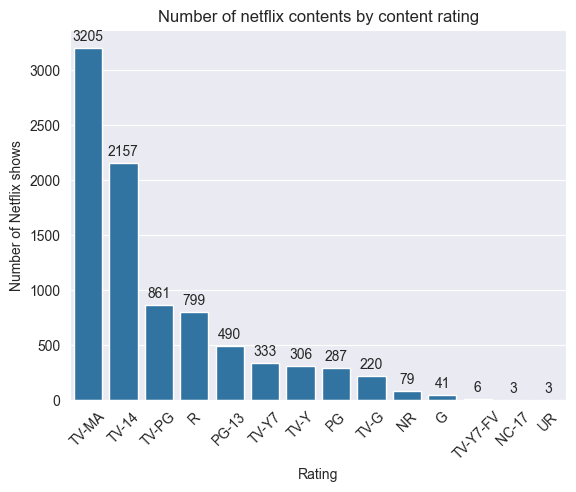

In [32]:
# What is the distribution of content ratings?
# Bar Chart: Number of netflix contents by content ratings
plt.Figure(figsize=(8,5))
ax = sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
ax.bar_label(ax.containers[0], label_type='edge', padding=3, fontsize=10)
plt.title('Number of netflix contents by content rating')
plt.xlabel('Rating')
plt.ylabel('Number of Netflix shows')
plt.xticks(rotation=45)
plt.show()

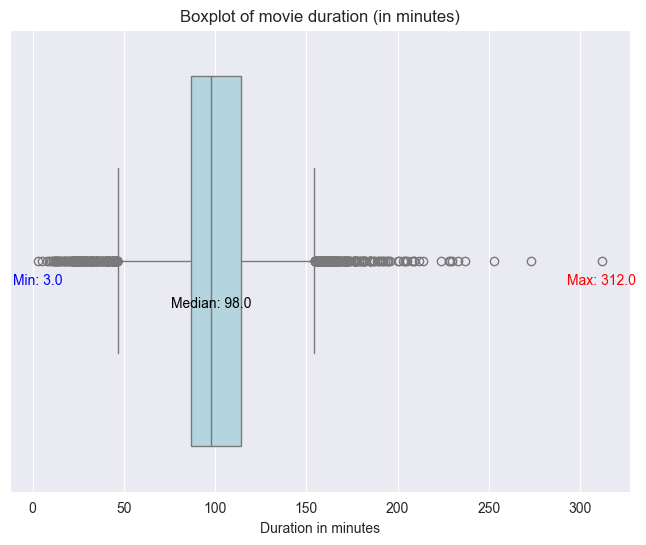

Movie Duration Statistics
mean       99.58
median     98.00
max       312.00
min         3.00
Name: duration_in_minutes, dtype: float64


In [ ]:
# Box plot chart for movie durations(in minute)
# What is the average, maximum and minimum duration(in minutes) of movies?

df['duration_in_minutes'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else None)
movies_df = df[df['type'] == 'Movie'].dropna(subset=['duration_in_minutes'])

stats = movies_df['duration_in_minutes'].agg(['mean', 'max', 'min', 'median']).round(2)


plt.figure(figsize=(8,6))
sns.boxplot(x=movies_df['duration_in_minutes'], color = 'lightblue')
plt.title('Boxplot of movie duration (in minutes)')
plt.xlabel('Duration in minutes')


plt.text(stats['min'], 0.05, f"Min: {stats['min']}", color='blue', ha='center', fontsize=10)
plt.text(stats['median'], 0.1, f"Median: {stats['median']}", color='black', ha='center', fontsize=10)
plt.text(stats['max'], 0.05, f"Max: {stats['max']}", color='red', ha='center', fontsize=10)

plt.show()

print("Movie Duration Statistics")
print(stats[['mean', 'median', 'max', 'min']])

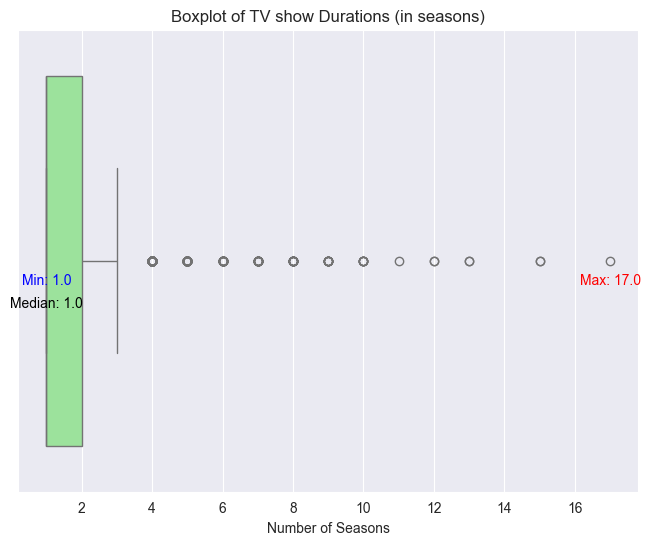

TV show Duration Statistics (in seasons)
mean       1.75
median     1.00
max       17.00
min        1.00
Name: duration_in_season, dtype: float64


In [48]:
# Box plot chart for TV shows durations(in seasons)
# What is the average, maximum, and minimum number of seasons for TV Shows?

df['duration_in_season'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'Season' in x else None)

shows_df = df[df['type'] == 'TV Show'].dropna(subset=['duration_in_season'])

stats = shows_df['duration_in_season'].agg(['mean', 'max', 'min', 'median']).round(2)

plt.figure(figsize=(8, 6))
sns.boxplot(x=shows_df['duration_in_season'], color='lightgreen')
plt.title('Boxplot of TV show Durations (in seasons)')
plt.xlabel('Number of Seasons')

plt.text(stats['min'], 0.05, f"Min: {stats['min']}", color='blue', ha='center', fontsize=10)
plt.text(stats['median'], 0.1, f"Median: {stats['median']}", color='black', ha='center', fontsize=10)
plt.text(stats['max'], 0.05, f"Max: {stats['max']}", color='red', ha='center', fontsize=10)

plt.show()

print("TV show Duration Statistics (in seasons)")
print(stats[['mean', 'median', 'max', 'min']])

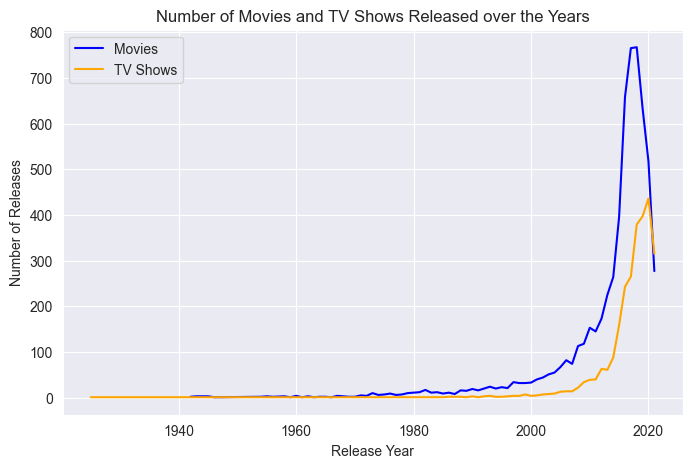

In [61]:
# Trend Analysis: Movies and TV Shows released over the Years.

plt.figure(figsize=(8,5))
# Line chart: Number of movies released by years
movies_df = df[df['type'] == 'Movie']
number_of_movies_by_year = movies_df['release_year'].value_counts().sort_index().reset_index()
number_of_movies_by_year.columns = ['release_year', 'movie_count']

# Plot line for movies
sns.lineplot(data=number_of_movies_by_year, x='release_year', y='movie_count', label='Movies', color='blue')

#Line chart: Number of TV shows released by years
TV_Show_df = df[df['type'] == 'TV Show']
number_of_TV_Show_by_year = TV_Show_df['release_year'].value_counts().sort_index().reset_index()
number_of_TV_Show_by_year.columns = ['release_year', 'TV_Show_count']

# Plot line for TV Shows
sns.lineplot(data = number_of_TV_Show_by_year,x ='release_year', y='TV_Show_count', label ='TV Shows', color='orange')

# Set titles and labels
plt.title('Number of Movies and TV Shows Released over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')

# Display the plot
plt.show()

In [50]:

#The Top 5 years with the highest number of movies released.

movie_counts_by_year = movies_df['release_year'].value_counts().sort_values(ascending=False)
print("Top 5 Years with most movies released")
print(movie_counts_by_year.head(5))

#The Bottom 6 years with the least number of movies released.

print("Bottom 6 Years with least movies released")
print(movie_counts_by_year.tail(6))

Top 5 Years with most movies released
release_year
2018    767
2017    765
2016    658
2019    633
2020    517
Name: count, dtype: int64
Bottom 6 Years with least movies released
release_year
1961    1
1959    1
1963    1
1966    1
1946    1
1947    1
Name: count, dtype: int64


In [51]:

# The Top 5 years with the highest number of TV Show released.

TV_Show_counts_by_year = TV_Show_df['release_year'].value_counts().sort_values(ascending=False)
print("Top 5 Years with most TV Show released")
print(TV_Show_counts_by_year.head(5))

#The Bottom 5 years with the least number of TV Show released.
print("Bottom 5 Years with least TV Show released")
print(TV_Show_counts_by_year.tail(5))

Top 5 Years with most TV Show released
release_year
2020    436
2019    397
2018    379
2021    315
2017    265
Name: count, dtype: int64
Bottom 5 Years with least TV Show released
release_year
1981    1
1985    1
1967    1
1989    1
1963    1
Name: count, dtype: int64


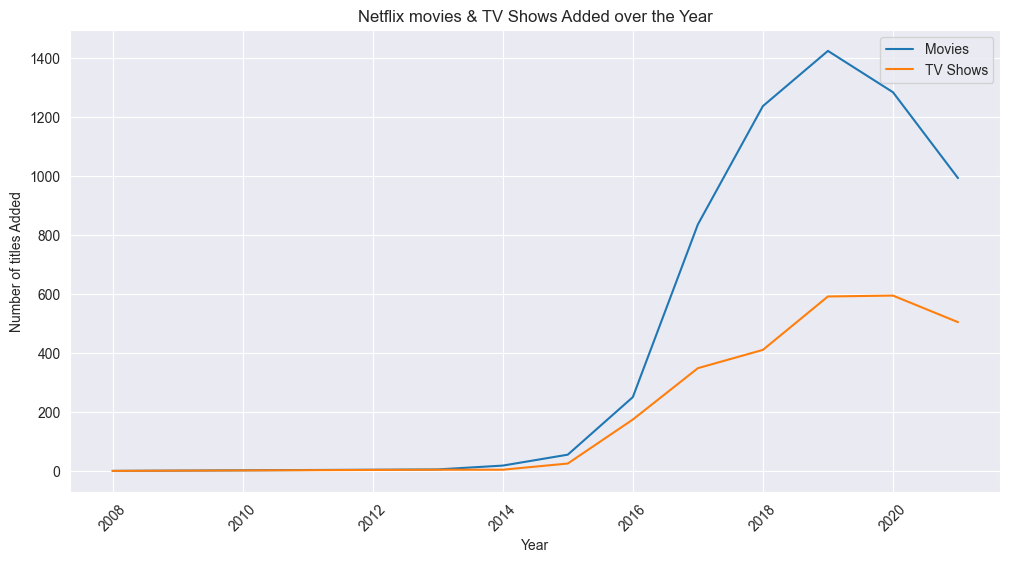

In [59]:
# Trend Analysis: Netflix Movies & TV Shows Added over the Year.

# Extract year
df['year_added'] = df['date_added'].dt.year 

# Filter Movies and TV Shows
movies_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

# Count movies and TV Shows added per year.
number_of_movies_by_year = movies_df['year_added'].value_counts().sort_index().reset_index()
number_of_movies_by_year.columns = ['year_added', 'movie_count']

number_of_tv_by_year = tv_df['year_added'].value_counts().sort_index().reset_index()
number_of_tv_by_year.columns = ['year_added', 'tv_count']

# Merge both datasets on year_added
combined_year_df = pd.merge(number_of_movies_by_year, number_of_tv_by_year, on='year_added')

# Plot both lines on same chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_year_df, x='year_added', y='movie_count', label='Movies')
sns.lineplot(data=combined_year_df, x='year_added', y='tv_count', label='TV Shows')

plt.title("Netflix movies & TV Shows Added over the Year")
plt.xlabel('Year')
plt.ylabel('Number of titles Added')
plt.xticks(rotation=45)
plt.show()

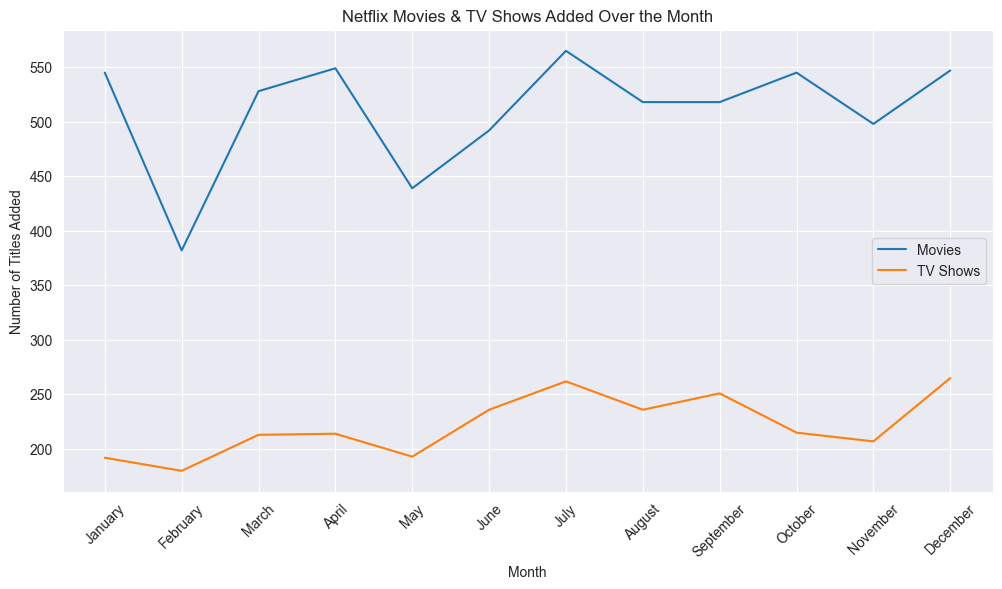

In [63]:

#9 Trend Analysis: Netflix Movies & TV Shows Added Over the Month

# Extract month name
df['month_added'] = df['date_added'].dt.month_name()

# Define specific calendar month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Filter Movies and TV Shows
movies_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

# Count movies and TV shows added per month
number_of_movies_by_month = movies_df['month_added'].value_counts().reindex(month_order).reset_index()
number_of_movies_by_month.columns = ['month_added', 'movie_count']

number_of_tv_by_month = tv_df['month_added'].value_counts().reindex(month_order).reset_index()
number_of_tv_by_month.columns = ['month_added', 'tv_count']

# Merge both datasets on month_added
combined_df = pd.merge(number_of_movies_by_month, number_of_tv_by_month, on='month_added')

# Plot both lines on the same chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='month_added', y='movie_count', label='Movies')
sns.lineplot(data=combined_df, x='month_added', y='tv_count', label='TV Shows')

plt.title('Netflix Movies & TV Shows Added Over the Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.show()

In [66]:
# Top 5 years with the highest number of movies added.
movie_counts_by_year = movies_df['year_added'].value_counts().sort_values(ascending=False)
print("Top 5 years with most Netflix Movies Added")
print(movie_counts_by_year.head())

# The Bottom 6 years with the least number of movies added.
print("Bottom 6 years with least Netflix Movies Added")
print(movie_counts_by_year.tail(6).sort_values())

Top 5 years with most Netflix Movies Added
year_added
2019    1424
2020    1284
2018    1237
2021     993
2017     836
Name: count, dtype: int64
Bottom 6 years with least Netflix Movies Added
year_added
2010     1
2008     1
2009     2
2012     3
2013     6
2011    13
Name: count, dtype: int64


In [67]:
# The top 5 years with the highest number of TV Shows Added.
tv_count_by_year = tv_df['year_added'].value_counts().sort_values(ascending=False)
print("Top 5 years with most Netflix TV Shows Added")
print(tv_count_by_year.head())

# The Bottom 6 years with the least number of TV Shows Added
print("Bottom 6 years with least Netflix TV Shows Added")
print(tv_count_by_year.tail(6).sort_values)

Top 5 years with most Netflix TV Shows Added
year_added
2020    595
2019    592
2021    505
2018    411
2017    349
Name: count, dtype: int64
Bottom 6 years with least Netflix TV Shows Added
<bound method Series.sort_values of year_added
2017    349
2016    175
2015     26
2013      5
2014      5
2008      1
Name: count, dtype: int64>


In [68]:
# The top 5 months with the highest number of movies Added.
movie_counts_by_month = movies_df['month_added'].value_counts().sort_values(ascending=False)
print('Top 5 Month with Most Movies Released')
print(movie_counts_by_month.head(5))

# The Bottom 6 months with the least nmuber of movies Added
print('Bottom 6 Months with least Netflix Movies Added')
print(movie_counts_by_month.tail(6).sort_values())

Top 5 Month with Most Movies Released
month_added
July        565
April       549
December    547
January     545
October     545
Name: count, dtype: int64
Bottom 6 Months with least Netflix Movies Added
month_added
February     382
May          439
June         492
November     498
September    518
August       518
Name: count, dtype: int64
